# Rubidium wavefunction and potential

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np

from ryd_numerov.rydberg import RydbergState

logging.basicConfig(level=logging.INFO, format="%(levelname)s %(filename)s: %(message)s")
logging.getLogger("ryd_numerov").setLevel(logging.DEBUG)

In [2]:
atom = RydbergState("Rb", n=130, l=129, j=129.5)
atom.create_wavefunction()

turning_points = {
    which: atom.model_potential.calc_z_turning_point(which, dz=1e-3)
    for which in ["hydrogen", "classical", "zerocrossing"]
}

DEBUG database.py: No Rydberg-Ritz parameters found for Rb with l=129 and j=129, returning zero quantum defects.
DEBUG database.py: No model potential parameters found for Rb with l=129, using values for largest l=3 instead


In [ ]:
hydrogen = RydbergState("H", n=atom.n, l=atom.l, j=atom.j)
hydrogen.create_model_potential(add_spin_orbit=False)
hydrogen.create_wavefunction()

DEBUG database.py: No Rydberg-Ritz parameters found for H with l=129 and j=129, returning zero quantum defects.
DEBUG database.py: No model potential parameters found for H with l=129, using values for largest l=0 instead


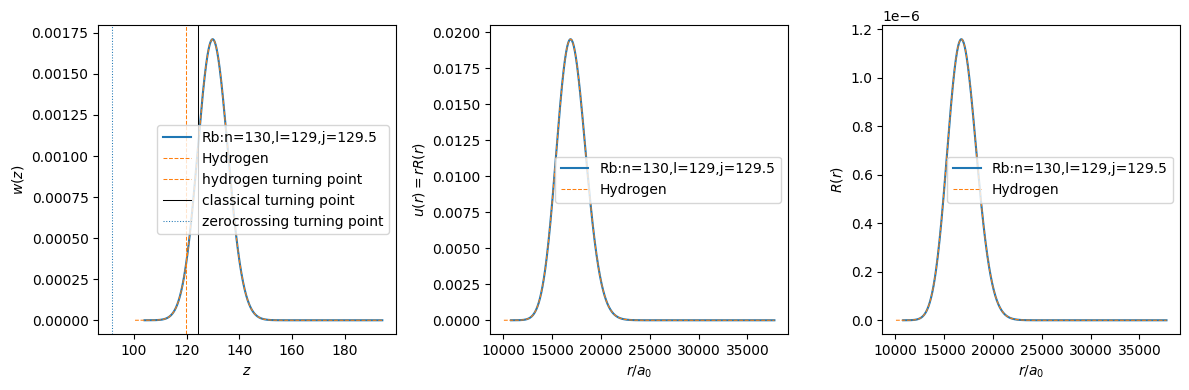

In [4]:
label = f"{atom.species}:n={atom.n},l={atom.l},j={atom.j}"
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].plot(atom.grid.z_list, atom.wavefunction.w_list, "C0-", label=label)
axs[0].plot(hydrogen.grid.z_list, hydrogen.wavefunction.w_list, "C1--", lw=0.75, label="Hydrogen")
axs[0].set_xlabel(r"$z$")
axs[0].set_ylabel(r"$w(z)$")

for key, z_i in turning_points.items():
    color = {"hydrogen": "C1", "classical": "k", "zerocrossing": "C0"}[key]
    ls = {"hydrogen": "--", "classical": "-", "zerocrossing": ":"}[key]
    axs[0].axvline(z_i, color=color, ls=ls, lw=0.75, label=f"{key} turning point")

axs[0].legend()


axs[1].plot(atom.grid.x_list, atom.wavefunction.u_list, "C0-", label=label)
axs[1].plot(hydrogen.grid.x_list, hydrogen.wavefunction.u_list, "C1--", lw=0.75, label="Hydrogen")
axs[1].set_xlabel(r"$r / a_0$")
axs[1].set_ylabel(r"$u(r) = r R(r)$")
axs[1].legend()

axs[2].plot(atom.grid.x_list, atom.wavefunction.r_list, "C0-", label=label)
axs[2].plot(hydrogen.grid.x_list, hydrogen.wavefunction.r_list, "C1--", lw=0.75, label="Hydrogen")
axs[2].set_xlabel(r"$r / a_0$")
axs[2].set_ylabel(r"$R(r)$")
axs[2].legend()


fig.tight_layout()
plt.show()

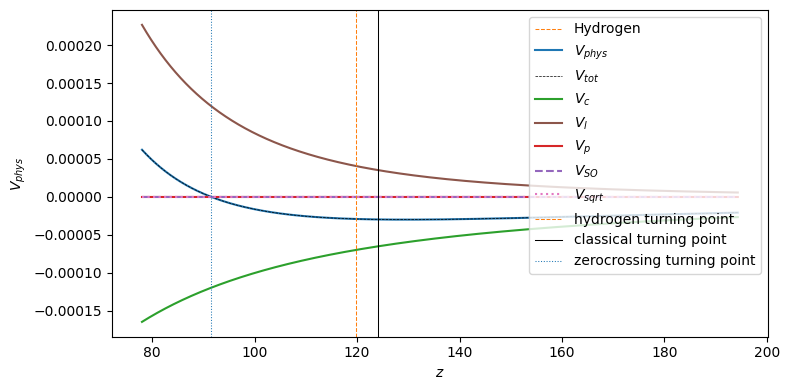

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))

new_z_list = np.linspace(0.75 * np.sqrt(atom.grid.x_min), np.sqrt(atom.grid.x_max), 10_000)
new_x_list = np.power(new_z_list, 2)
atom_v_phys = atom.model_potential.calc_total_physical_potential(new_x_list)
hydrogen_v_phys = hydrogen.model_potential.calc_total_physical_potential(new_x_list)

ax.plot(new_z_list, hydrogen_v_phys, "C1--", lw=0.75, label="Hydrogen")

ax.plot(new_z_list, atom.model_potential.calc_total_physical_potential(new_x_list), "C0-", label=r"$V_{phys}$")
ax.plot(new_z_list, atom.model_potential.calc_total_effective_potential(new_x_list), "k--", lw=0.5, label=r"$V_{tot}$")
if True:
    ax.plot(new_z_list, atom.model_potential.calc_potential_core(new_x_list), "C2-", label=r"$V_c$")
    ax.plot(new_z_list, atom.model_potential.calc_potential_centrifugal(new_x_list), "C5-", label=r"$V_l$")
    ax.plot(new_z_list, atom.model_potential.calc_potential_core_polarization(new_x_list), "C3-", label=r"$V_p$")
    ax.plot(new_z_list, atom.model_potential.calc_potential_spin_orbit(new_x_list), "C4--", label=r"$V_{SO}$")
    ax.plot(new_z_list, atom.model_potential.calc_effective_potential_sqrt(new_x_list), "C6:", label=r"$V_{sqrt}$")

for key, z_i in turning_points.items():
    color = {"hydrogen": "C1", "classical": "k", "zerocrossing": "C0"}[key]
    ls = {"hydrogen": "--", "classical": "-", "zerocrossing": ":"}[key]
    ax.axvline(z_i, color=color, ls=ls, lw=0.75, label=f"{key} turning point")

ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$V_{phys}$")
ax.legend(loc="upper right")

fig.tight_layout()
plt.show()